# Predicting heart disease using machine learning

this notebook looks into using various Python-base machine learning and data science libraries in attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We are going to take the follwing approach:
1. Problem definition
2. Look at the data
3. Evaluation (what defines our success)
4. Features and target
5. Modelling
6. Experimentation

More specifically, we'll look at the following topics.

* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once we've found a good model, how can we improve it?
* Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
* Reporting what we've found - if we had to present our work, what would we show someone?
* To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

## 1. Problem definition
In a statement,
> Given clinical parameters about a patient, can we predict if he has heart-disease or not ?

## 2. Data
the original data came from the Cleveland data from the UCI ML repository.

There is also a version available on Kaggle: https://www.kaggle.com/datasets/heptapod/uci-ml-datasets


## 3. Evaluation: what defines the success of the model

Since we want to determine whether or not a patient has heart disease or not:
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This where we get different information about each of the features in the data.

** create data dictionary ** 

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.


## Preparing the tools

we're going to use pandas, Matplotlib and Numpy for data analyis manipulation.

In [9]:
# import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots appear in the notebook
%matplotlib inline 

# models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [26]:
# import the data
df = pd.read_csv('data/heart-disease.csv')

# explore a bit the data:

df.shape

(303, 14)

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [29]:
# Let'find out how classes are there (classification problem for the target)
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

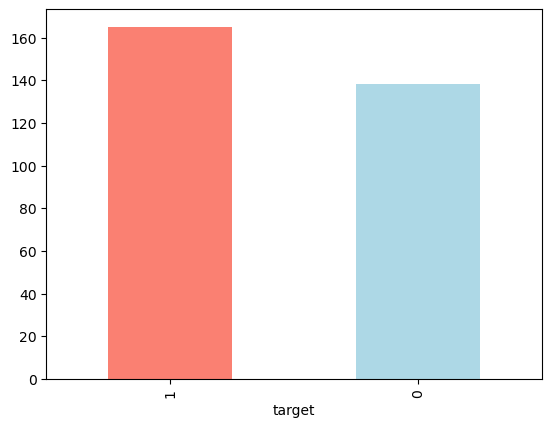

In [30]:
# Two classes, let's represent them on a plot:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [31]:
# Let's get some more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease frequency accoring to sex

In [34]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [37]:
# we can compare column like this:
sex_vs_target = pd.crosstab(df.target, df.sex)
sex_vs_target

sex,0,1
target,,
0,24,114
1,72,93


from this we roughly say that ~75% of women in the data is likely to heave heart disease and ~50% of men 

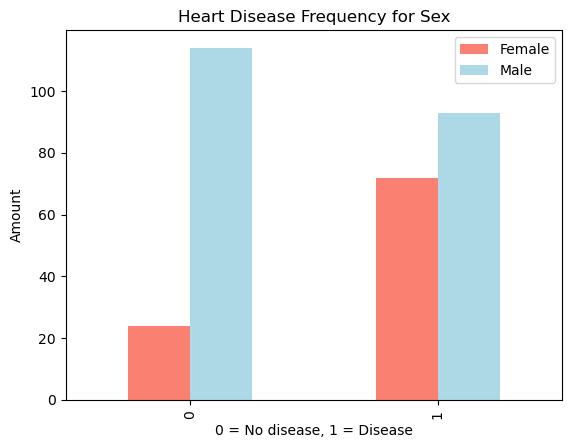

In [50]:
# create a plot of crosstab (better)

sex_vs_target.plot(kind='bar', color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Sex');
plt.xlabel('0 = No disease, 1 = Disease');
plt.ylabel('Amount');
plt.legend(['Female','Male']);
plt.xticks(rotation='vertical');
plt.show();

## Age vs. max heart rate for heart disease

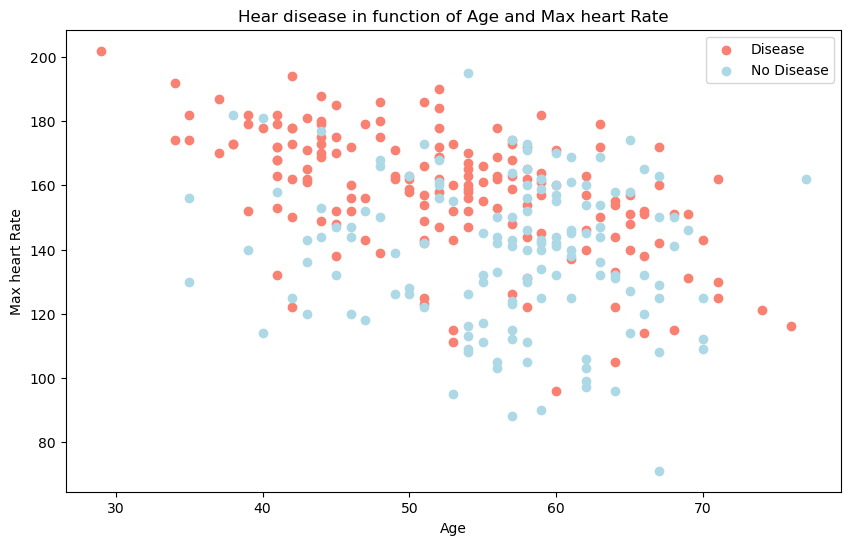

In [61]:
# create another figure:
plt.figure(figsize=(10,6))

# scatter with positive number

plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1], 
            color='salmon'
           );

#scatter with negative example
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0], 
            color='lightblue'
           );

plt.title('Hear disease in function of Age and Max heart Rate');
plt.xlabel('Age');
plt.ylabel('Max heart Rate');
plt.legend(['Disease','No Disease']);

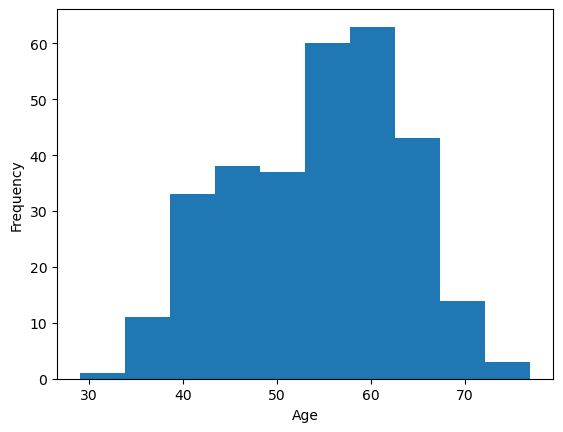

In [66]:
# what is the distribution or spread of the data ?
df.age.plot.hist();
plt.xlabel('Age');

## Heart disease frequency per chest pain type

In [67]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


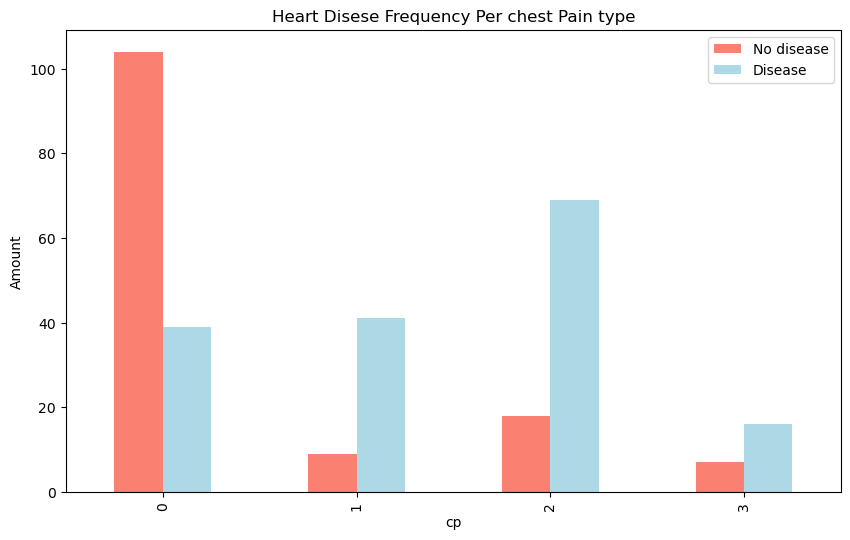

In [73]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot.bar(figsize=(10,6), color=['salmon','lightblue']);
plt.title('Heart Disese Frequency Per chest Pain type');
plt.ylabel('Amount');
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation='vertical');

In [74]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


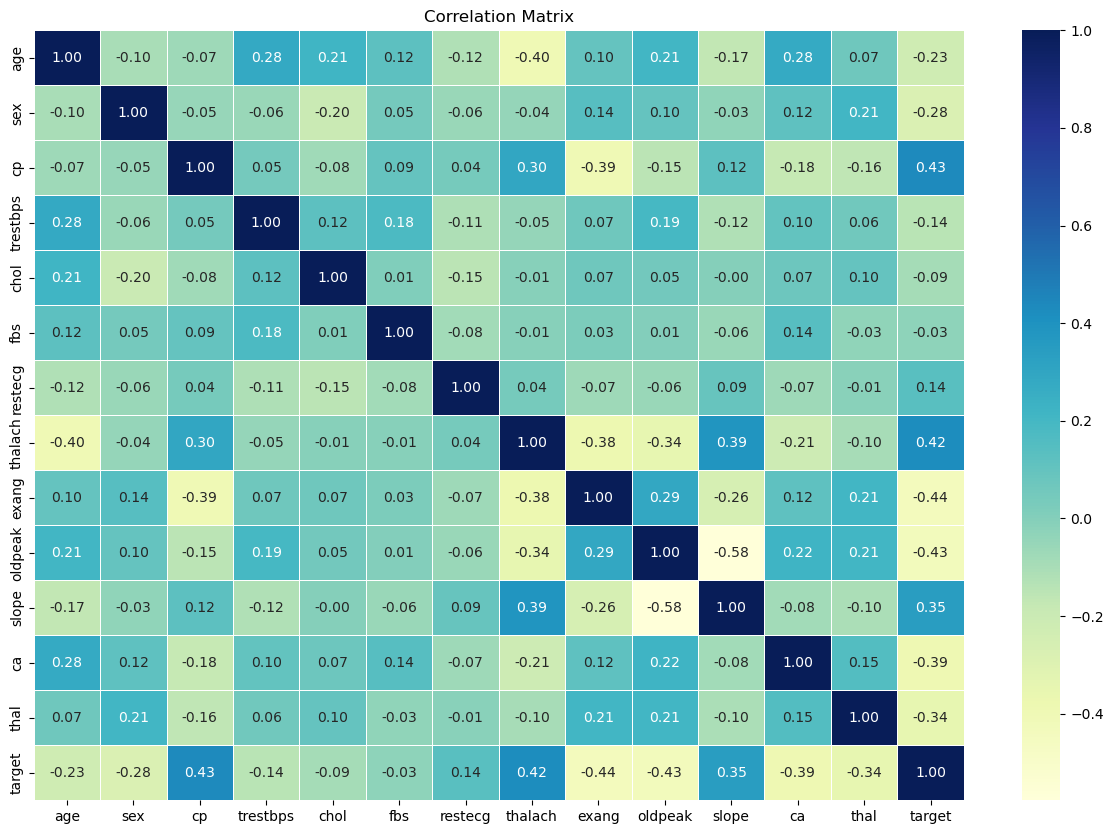

In [81]:
# let's make this a little bit more prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');
plt.title('Correlation Matrix');

From this we can evaluate the correlation between column: are they evolving in the same direction or not 

## 5.0 Modeling

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
# Split the data into features and labels, create train and test sets
# feature and target
X = df.drop('target',axis=1)
y = df.target
# train and test plit
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Now we have our data split into train and test sets. It is the time to build the ML model. 
We will train it on the train set and test it on the test set. 
What model should we use ? -> https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

We are going to test several of those:
* RandomForestClassifier
* K-Nearest Neighbours Classifier
* LogisticRegression (still a classification algorithm)

In [103]:
# Put models in a dictionnary
models = {'Logistic Regression':LogisticRegression(), 
         'KNN': KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()
         }
# create a function to fit and score models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fit an evaluate given ML models.
    models: a dict of different sklearn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training lables
    y_test: test lables
    """
    # Set a random seeds
    np.random.seed(42)
    # Make a dictionnary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its socre to model_score
        model_scores[name] = round(model.score(X_test, y_test),4)

    return model_scores


In [108]:
socres = fit_and_score(models, X_train, X_test, y_train, y_test)
socres

/Users/maximecollet/Desktop/Bureau - iMac de Maxime/DOC MAX/Courses/ZTM_ML_and_DS_bootcamp/milestone_1/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852, 'KNN': 0.6885, 'Random Forest': 0.8361}

### Model comparison

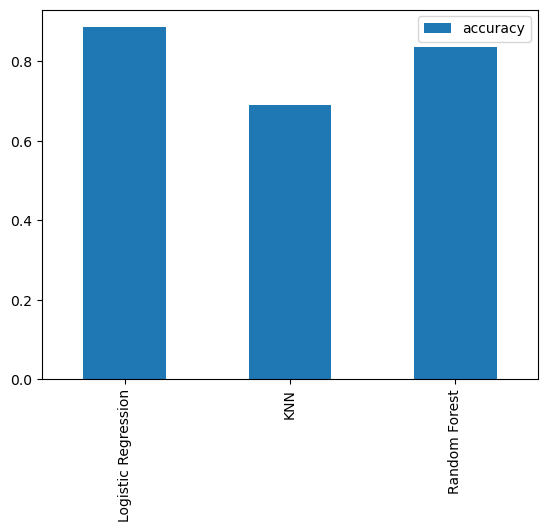

In [115]:
model_scores = pd.DataFrame(socres, index=['accuracy'])
model_scores.T.plot.bar();

In [117]:
model_scores.T

,accuracy
Logistic Regression,0.8852
KNN,0.6885
Random Forest,0.8361


At this point we can say that KNN is not the one to go with. So we will drop it.

Now we have got a baseline model and we know its first prediction. So the next step:

Let's look at the following:

In every ML model
* hyperparameter tuning
* Feature importance

Specific to classification: 
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [120]:
# Let's tune KNN
training_scores = []
test_scores = []

# Create a lit of different values for n_neighbors .

neighbors = range(1,21)

# set up KNN instance

knn = KNeighborsClassifier()

#loop trough different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the model
    knn.fit(X_train, y_train)
    training_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data: 75.41%


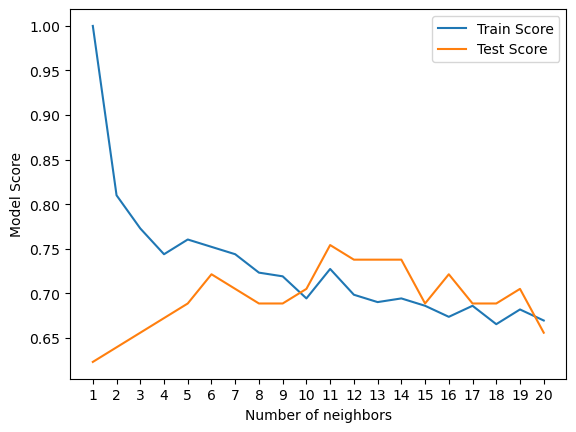

In [123]:
plt.plot(neighbors, training_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of neighbors')
plt.xticks(range(1,21))
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Well even with improving tuning the hyperparameter, it appears that we need to discard the KNN algorithm.

## Hyperparameter tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [124]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4,4),
               'solver':['liblinear']
               }
#create hyperparameter grid for RandomForestClassifier()

rf_reg_grid = {'n_estimators': np.arange(10,1000,50),
              'max_depth':[None,3,5,10],
               'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2)
              }

Now we have got hyperparameters for each of our models, let's tune them using RandomizedSearcCV.#

In [125]:
# Tune LogisticRegression
np.random.seed(42)

# Setup Random hyperparameters seach for LogisiticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                               )
# Fit Random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [126]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.12648552168552957}

In [127]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

We have tune LogisticRegression(), let's do the same for RandomForestClassifier()

In [128]:
#Setup random seed
np.random.seed(42)

# Set random hyperparameter search for RandomForestClassifier()

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose=True)

# fit randomHyperparameter search model for RandomForestClassifier()

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [129]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [130]:
# Evaluate the randomized search random forest 
rs_rf.score(X_test, y_test)

0.8688524590163934

Ok at this point, it seems that LogisticRegression() is the best candidate. So we will push the hyperparameter tuning on this model using GridSearchCV that will evaluate all the combinaition of parameters in order to evaluate which one are the best. 

## Hyperparameter tuning using GridSearchCV()

Since our LogisticRegression model provides the best score so far, we will try and improve them again using GridSearchCV

In [132]:
# Different hyperparameters for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver':['liblinear']
               }

# setup grid hyperparameter search for LogisticRegression

gs_log_ref = GridSearchCV(LogisticRegression(), 
                         param_grid=log_reg_grid,
                          cv = 5,
                          verbose=True
                         )
# fit grid hyperparameter search model
gs_log_ref.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [154]:
# check the best hyperparameters.
gs_log_ref.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [155]:
#Evaluate the grid
gs_log_ref.score(X_test, y_test)

0.8852459016393442

## Evaluate our tune machine learning classifier, beyond accuracy
* ROC curve
* AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great to use cross-validation where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [172]:
# We make predictions with tuned model.

y_preds = gs_log_ref.predict(X_test)

In [173]:
y_preds.shape

(61,)

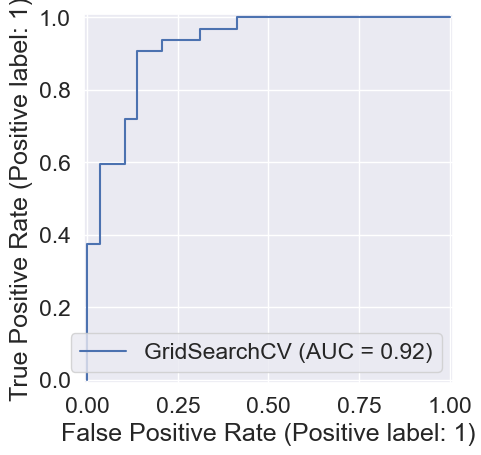

In [174]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_estimator(gs_log_ref, X_test, y_test)

In [159]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [165]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots of a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    

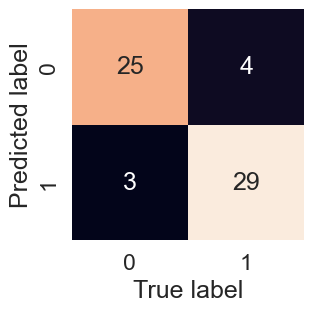

In [166]:
plot_conf_mat(y_test, y_preds)

Now we have got a AUC metric, a ROC curve and a confusion matrix. Let's get a classification report as well as cross validated precision, recall and f1-score

In [176]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation matrix using cross validation

we're going to calculate accuracy, precison, recall, f1 score of our model using cross validation. And to do so, we will use cross_val_score(). 

In [178]:
# check best hypter parameters
gs_log_ref.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [180]:
# create a new classifier in order to apply those parameter before makin the cross validation
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [181]:
# cross validation accuracy
cv_acc = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [182]:
# cross validation precision
cv_prec = cross_val_score(clf, X,y, cv=5, scoring='precision')
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [183]:
# cross validation f1
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [184]:
# cross validation recall
cv_rec = cross_val_score(clf, X,y, cv=5, scoring='recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

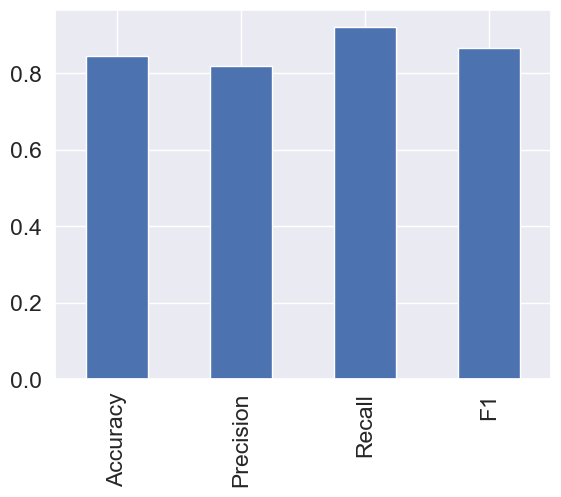

In [192]:
#  visual our cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_prec,
                          'Recall': cv_rec,
                          'F1':cv_f1}, index=[0])
cv_metrics.T.plot.bar(legend=False);

### Feature importance 

Feature importance is another way to ask: 'which features contributed msot of the outcomes of the model and how dit they contribute' ?

Finding feature importance is difference for each ML model

Let's find the feature importance for our LogisticRegression model ... 

In [193]:
# Fit and instance of LogisticRegression
gs_log_ref.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train);

In [208]:
# check coef_
clf.coef_.ndim

2

In [196]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [197]:
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

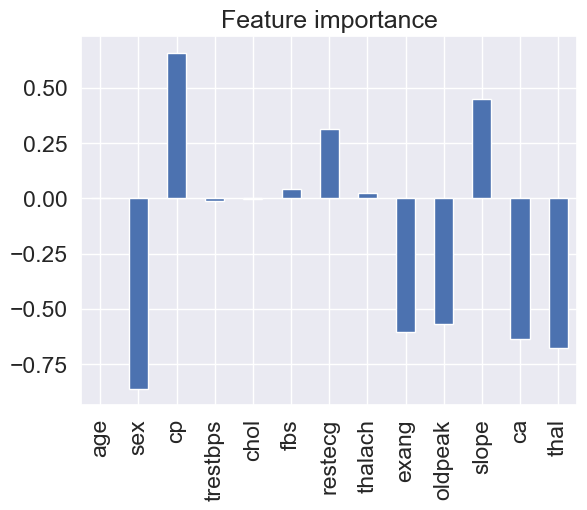

In [210]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False);